In [21]:
import tensorflow as tf
import keras
from keras.models import load_model
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import pandas
import h5py
import glob
from PIL import Image


In [22]:
model = tf.keras.models.load_model("weights.h5")

In [23]:
def get_filenames():
    global path
    path = r"test"
    return os.listdir(path)

In [24]:
def autoroi(img):

    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    thresh = cv2.threshold(gray_img, 130, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.dilate(thresh, None, iterations=5)

    contours, hierarchy = cv2.findContours(
        thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    biggest = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(biggest)
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 256, 0), 2)
    roi = img[y:y+h, x:x+w]

    return roi

In [25]:
def preprocess_image(image_path, desired_size=224):
    im = Image.open(image_path)
    im = im.resize((desired_size, )*2, resample=Image.LANCZOS)
    
    return im

In [28]:
def prediction():
    predictions = []
    list_of_files = glob.glob('Images/*') #testing different files
    for latest_file in list_of_files:
        img = preprocess_image(latest_file)
        plt.imshow(img)
        plt.show()
        x = np.empty((1, 224, 224, 3), dtype=np.uint8)
        x[0, :, :, :] = preprocess_image(latest_file)
        prediction = model.predict(x)
        print(prediction)
#         prediction = prediction.argmax()
        


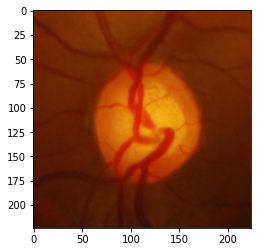

[[1. 0.]]


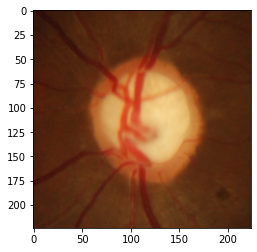

[[1. 0.]]


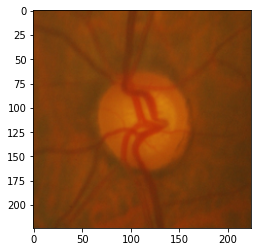

[[1. 0.]]


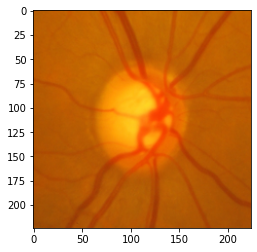

[[1. 0.]]


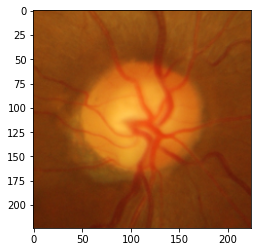

[[1. 0.]]


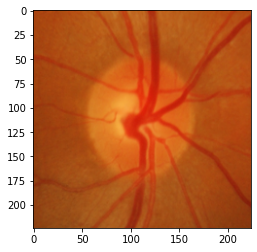

[[1. 0.]]


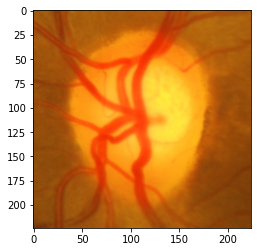

[[1. 0.]]


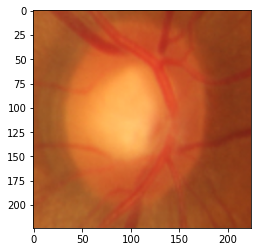

[[1. 0.]]


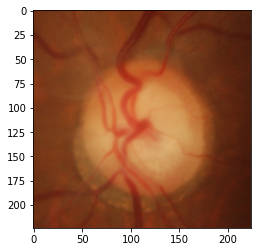

[[1. 0.]]


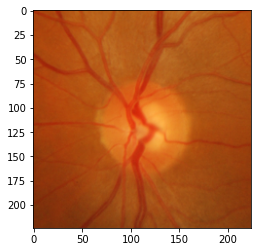

[[1. 0.]]


In [29]:
prediction()